In [2]:
import cv2 as cv
import matplotlib.pyplot as plt

from os import listdir, path, makedirs
from os.path import isfile, join
import shutil
import numpy as np
from sklearn.metrics import accuracy_score

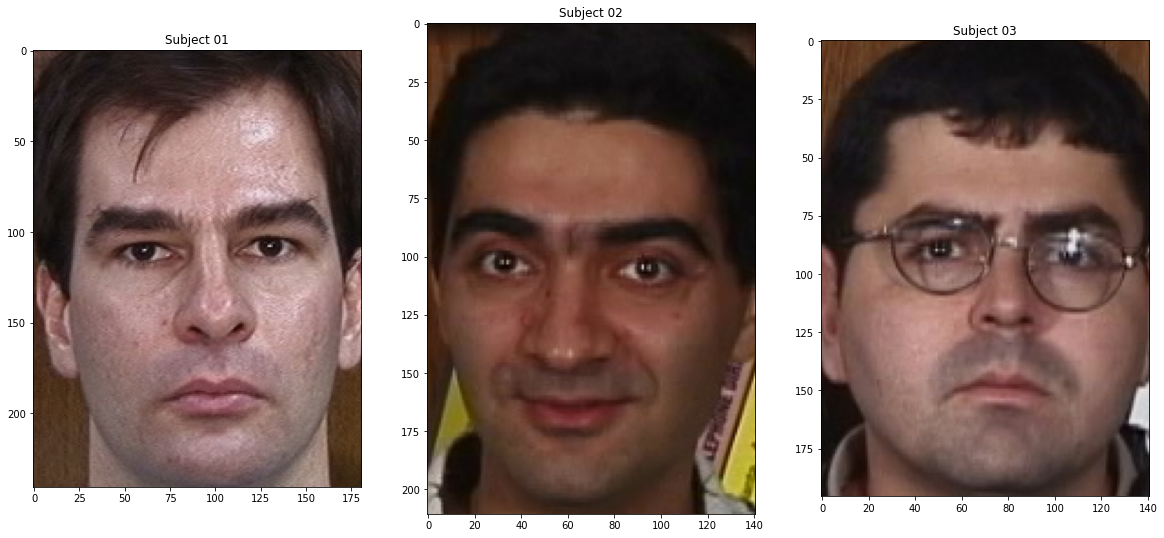

In [3]:
image_face_1 = cv.imread("cropped_faces/s01_01.jpg");
image_face_1 = cv.cvtColor(image_face_1, cv.COLOR_BGR2RGB)

image_face_2 = cv.imread("cropped_faces/s02_01.jpg");
image_face_2 = cv.cvtColor(image_face_2, cv.COLOR_BGR2RGB)

image_face_3 = cv.imread("cropped_faces/s03_01.jpg");
image_face_3 = cv.cvtColor(image_face_3, cv.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title("Subject 01")
plt.imshow(image_face_1)
plt.subplot(132)
plt.title("Subject 02")
plt.imshow(image_face_2)
plt.subplot(133)
plt.title("Subject 03")
plt.imshow(image_face_3)
plt.show()

In [4]:
image_face_1.shape

(241, 181, 3)

In [5]:
image_face_2.shape

(211, 141, 3)

In [6]:
image_face_3.shape

(196, 141, 3)

In [7]:
faces_path = "cropped_faces/"
file_faces_list = [f for f in listdir(faces_path) if isfile(join(faces_path, f))]

In [8]:
file_faces_list.sort()
print(file_faces_list)

['s01_01.jpg', 's01_02.jpg', 's01_03.jpg', 's01_04.jpg', 's01_05.jpg', 's01_06.jpg', 's01_07.jpg', 's01_08.jpg', 's01_09.jpg', 's01_10.jpg', 's01_11.jpg', 's01_12.jpg', 's01_13.jpg', 's01_14.jpg', 's01_15.jpg', 's02_01.jpg', 's02_02.jpg', 's02_03.jpg', 's02_04.jpg', 's02_05.jpg', 's02_06.jpg', 's02_07.jpg', 's02_08.jpg', 's02_09.jpg', 's02_10.jpg', 's02_11.jpg', 's02_12.jpg', 's02_13.jpg', 's02_14.jpg', 's02_15.jpg', 's03_01.jpg', 's03_02.jpg', 's03_03.jpg', 's03_04.jpg', 's03_05.jpg', 's03_06.jpg', 's03_07.jpg', 's03_08.jpg', 's03_09.jpg', 's03_10.jpg', 's03_11.jpg', 's03_12.jpg', 's03_13.jpg', 's03_14.jpg', 's03_15.jpg', 's04_01.jpg', 's04_02.jpg', 's04_03.jpg', 's04_04.jpg', 's04_05.jpg', 's04_06.jpg', 's04_07.jpg', 's04_08.jpg', 's04_09.jpg', 's04_10.jpg', 's04_11.jpg', 's04_12.jpg', 's04_13.jpg', 's04_14.jpg', 's04_15.jpg', 's05_01.jpg', 's05_02.jpg', 's05_03.jpg', 's05_04.jpg', 's05_05.jpg', 's05_06.jpg', 's05_07.jpg', 's05_08.jpg', 's05_09.jpg', 's05_10.jpg', 's05_11.jpg', 's05_

In [9]:
faces_path_train = "train/"
faces_path_test = "test/"

if not path.exists(faces_path_train):
    makedirs(faces_path_train)
    
if not path.exists(faces_path_test):
    makedirs(faces_path_test)

for file_face in file_faces_list:
    subject_face = file_face[1:3]
    number_face = file_face[4:6]
    
    if int(number_face) <= 10:
        shutil.copyfile(faces_path + file_face, faces_path_train + file_face)
    else:
        shutil.copyfile(faces_path + file_face, faces_path_test + file_face)

In [10]:
def prepare_images(image_path):
    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    image = cv.resize(image, (200, 200), interpolation=cv.INTER_LANCZOS4)
    return image

In [11]:
list_faces_train = [f for f in listdir(faces_path_train) if isfile(join(faces_path_train, f))]
list_faces_test = [f for f in listdir(faces_path_test) if isfile(join(faces_path_test, f))]

In [12]:
list_faces_train.sort()
list_faces_train

['s01_01.jpg',
 's01_02.jpg',
 's01_03.jpg',
 's01_04.jpg',
 's01_05.jpg',
 's01_06.jpg',
 's01_07.jpg',
 's01_08.jpg',
 's01_09.jpg',
 's01_10.jpg',
 's02_01.jpg',
 's02_02.jpg',
 's02_03.jpg',
 's02_04.jpg',
 's02_05.jpg',
 's02_06.jpg',
 's02_07.jpg',
 's02_08.jpg',
 's02_09.jpg',
 's02_10.jpg',
 's03_01.jpg',
 's03_02.jpg',
 's03_03.jpg',
 's03_04.jpg',
 's03_05.jpg',
 's03_06.jpg',
 's03_07.jpg',
 's03_08.jpg',
 's03_09.jpg',
 's03_10.jpg',
 's04_01.jpg',
 's04_02.jpg',
 's04_03.jpg',
 's04_04.jpg',
 's04_05.jpg',
 's04_06.jpg',
 's04_07.jpg',
 's04_08.jpg',
 's04_09.jpg',
 's04_10.jpg',
 's05_01.jpg',
 's05_02.jpg',
 's05_03.jpg',
 's05_04.jpg',
 's05_05.jpg',
 's05_06.jpg',
 's05_07.jpg',
 's05_08.jpg',
 's05_09.jpg',
 's05_10.jpg',
 's06_01.jpg',
 's06_02.jpg',
 's06_03.jpg',
 's06_04.jpg',
 's06_05.jpg',
 's06_06.jpg',
 's06_07.jpg',
 's06_08.jpg',
 's06_09.jpg',
 's06_10.jpg',
 's07_01.jpg',
 's07_02.jpg',
 's07_03.jpg',
 's07_04.jpg',
 's07_05.jpg',
 's07_06.jpg',
 's07_07.j

In [13]:
list_faces_test.sort()
list_faces_test

['s01_11.jpg',
 's01_12.jpg',
 's01_13.jpg',
 's01_14.jpg',
 's01_15.jpg',
 's02_11.jpg',
 's02_12.jpg',
 's02_13.jpg',
 's02_14.jpg',
 's02_15.jpg',
 's03_11.jpg',
 's03_12.jpg',
 's03_13.jpg',
 's03_14.jpg',
 's03_15.jpg',
 's04_11.jpg',
 's04_12.jpg',
 's04_13.jpg',
 's04_14.jpg',
 's04_15.jpg',
 's05_11.jpg',
 's05_12.jpg',
 's05_13.jpg',
 's05_14.jpg',
 's05_15.jpg',
 's06_11.jpg',
 's06_12.jpg',
 's06_13.jpg',
 's06_14.jpg',
 's06_15.jpg',
 's07_11.jpg',
 's07_12.jpg',
 's07_13.jpg',
 's07_14.jpg',
 's07_15.jpg',
 's08_11.jpg',
 's08_12.jpg',
 's08_13.jpg',
 's08_14.jpg',
 's08_15.jpg',
 's09_11.jpg',
 's09_12.jpg',
 's09_13.jpg',
 's09_14.jpg',
 's09_15.jpg',
 's10_11.jpg',
 's10_12.jpg',
 's10_13.jpg',
 's10_14.jpg',
 's10_15.jpg',
 's11_11.jpg',
 's11_12.jpg',
 's11_13.jpg',
 's11_14.jpg',
 's11_15.jpg',
 's12_11.jpg',
 's12_12.jpg',
 's12_13.jpg',
 's12_14.jpg',
 's12_15.jpg',
 's13_11.jpg',
 's13_12.jpg',
 's13_13.jpg',
 's13_14.jpg',
 's13_15.jpg',
 's14_11.jpg',
 's14_12.j

In [14]:
train_data, labels = [],[]

In [15]:
for i, file in enumerate(list_faces_train):
    image_path = faces_path_train + file
    image = prepare_images(image_path)
    train_data.append(image)
    labels.append(int(file[1:3]))

In [16]:
test_data, test_labels = [],[]

In [17]:
for i, file in enumerate(list_faces_test):
    image_path = faces_path_test + file
    image = prepare_images(image_path)
    test_data.append(image)
    test_labels.append(int(file[1:3]))

Text(0.5, 1.0, '1')

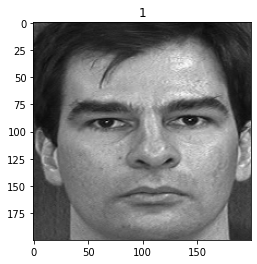

In [18]:
plt.imshow(train_data[0], cmap="gray")
plt.title(labels[0])

Text(0.5, 1.0, '1')

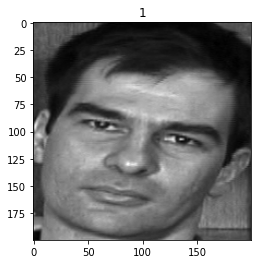

In [19]:
plt.imshow(test_data[0], cmap="gray")
plt.title(test_labels[0])

In [20]:
labels = np.asarray(labels, dtype=np.int32)
test_labels = np.asarray(test_labels, dtype=np.int32)

In [21]:
test_labels

array([ 1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14,
       14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17,
       18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21,
       21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24,
       24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28,
       28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31,
       31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34,
       35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 38, 38,
       38, 38, 38, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 41, 41, 41, 41,
       41, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 45,
       45, 45, 45, 45, 46

In [22]:
# need to install opencv_contrib_python 
modelo_eigenfaces = cv.face.EigenFaceRecognizer_create()
modelo_eigenfaces.train(train_data, labels)

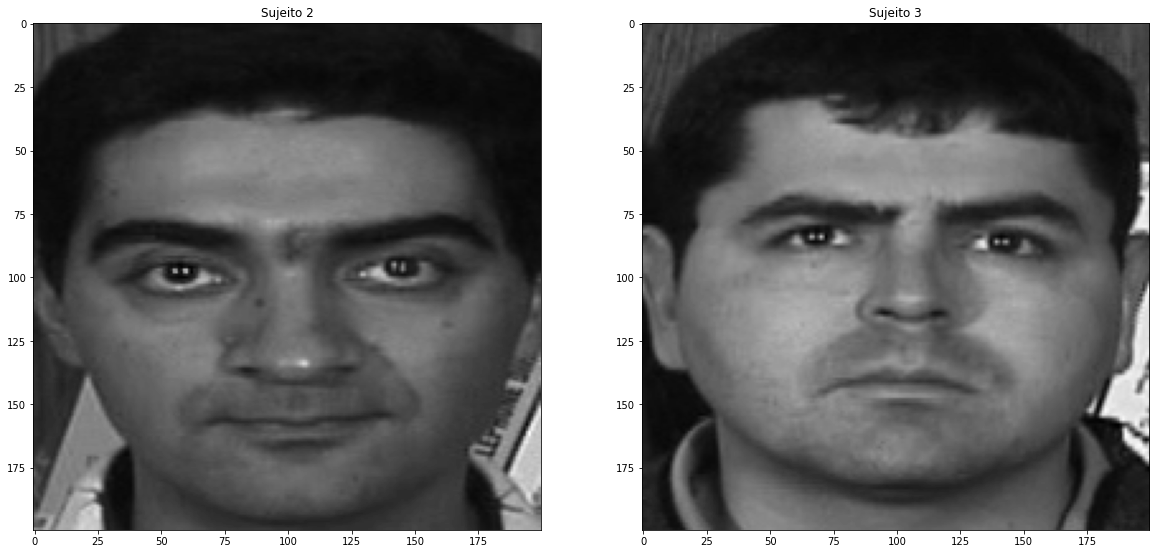

In [32]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(test_labels[6]))
plt.imshow(test_data[6], cmap="gray")

plt.subplot(122)
plt.title("Sujeito " + str(test_labels[12]))
plt.imshow(test_data[12], cmap="gray")

plt.show()

In [30]:
predicao = modelo_eigenfaces.predict(test_data[75])
predicao

(16, 4709.239799177273)

In [75]:
len(labels)

500

In [31]:
modelo_fisherfaces = cv.face.FisherFaceRecognizer_create()
modelo_fisherfaces.train(train_data, labels)

In [33]:
predicao = modelo_fisherfaces.predict(test_data[12])
predicao

(3, 844.2712755421)

In [34]:
modelo_lbph = cv.face.LBPHFaceRecognizer_create()
modelo_lbph.train(train_data, labels)

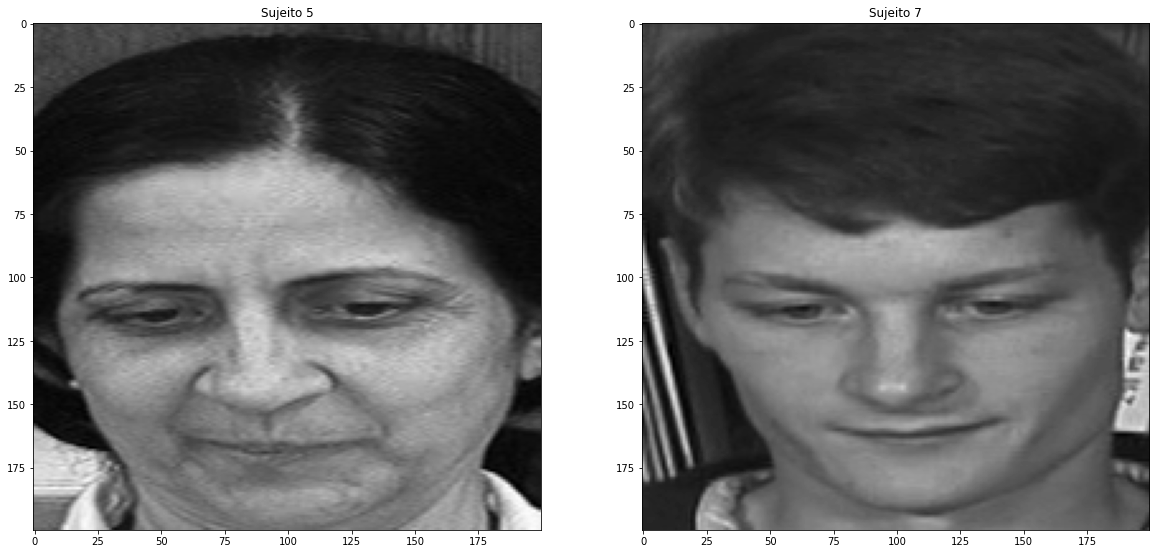

In [35]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito " + str(test_labels[20]))
plt.imshow(test_data[20], cmap="gray")

plt.subplot(122)
plt.title("Sujeito " + str(test_labels[33]))
plt.imshow(test_data[33], cmap="gray")

plt.show()

In [41]:
predicao = modelo_lbph.predict(test_data[33])
predicao

(7, 36.794573567197695)

In [42]:
y_pred_eigenfaces = []

In [43]:
for item in test_data:
    y_pred_eigenfaces.append(modelo_eigenfaces.predict(item)[0])

In [44]:
acuracia_eigenfaces = accuracy_score(test_labels, y_pred_eigenfaces)

In [45]:
acuracia_eigenfaces

0.724

In [46]:
y_pred_fisherfaces = []

for item in test_data:
    y_pred_fisherfaces.append(modelo_fisherfaces.predict(item)[0])

acuracia_fisherfaces = accuracy_score(test_labels, y_pred_fisherfaces)
acuracia_fisherfaces

0.52

In [47]:
y_pred_lbph = []

for item in test_data:
    y_pred_lbph.append(modelo_lbph.predict(item)[0])

acuracia_lbph = accuracy_score(test_labels, y_pred_lbph)
acuracia_lbph

0.792